In [1]:
using Plots
import Plots: px
theme(:default)
ENV["LINES"] = 20

20

In [2]:
include("parser.jl")
include("models-collapsed.jl")
download(SIGDataSet)

true

In [3]:
data  = map(parseDataLine, eachline("./data/Sigmorphon/task1/all/spanish-train-high"));
vocab = Vocabulary(data)
edata = encode(data,vocab);
test  = map(parseDataLine, eachline("./data/Sigmorphon/task1/all/spanish-test"));
tdata = encode(test,vocab);
dictionary = [parseDataLine(line) for line in  eachline("./data/unimorph/spa/spa") if line != ""];

In [4]:
vocab.chars.toElement;

In [5]:
vocab.specialIndices

(unk = 1, mask = 2, eow = 3, bow = 4)

In [6]:
trainsfs = unique(map(x->join(x.surface),data));
testsfs  =  unique(map(x->join(x.surface),test)); 
dictsfs  = unique([map(x->join(x.surface),dictionary); trainsfs; testsfs]);

In [7]:
morph = EncAttentiveVAE(length(vocab.chars); H=512, E=16, Z=16)
train1!(morph, data, vocab; optim=Adam(), epoch=35)

(kl_weight = 0.0f0, loss = 26.628804830932616)
(kl_weight = 0.0f0, loss = 21.583898071289063)
(kl_weight = 0.0f0, loss = 20.148736016845703)
(kl_weight = 0.0f0, loss = 19.222320547485353)
(kl_weight = 0.1f0, loss = 18.388326710510253)
(kl_weight = 0.2f0, loss = 17.40866569671631)
(kl_weight = 0.3f0, loss = 16.524448292541503)
(kl_weight = 0.4f0, loss = 15.719558264160156)
(kl_weight = 0.5f0, loss = 14.98790866241455)
(kl_weight = 0.6f0, loss = 14.377257498168944)
(kl_weight = 0.70000005f0, loss = 13.759855989074707)
(kl_weight = 0.8000001f0, loss = 13.251962525939941)
(kl_weight = 0.9000001f0, loss = 12.813460008239746)
(kl_weight = 1.0f0, loss = 12.417394267272948)
(kl_weight = 1.0f0, loss = 12.101434184265136)
(kl_weight = 1.0f0, loss = 11.841958569335938)
(kl_weight = 1.0f0, loss = 11.643867361450196)
(kl_weight = 1.0f0, loss = 11.487482531738282)
(kl_weight = 1.0f0, loss = 11.352401768493653)
(kl_weight = 1.0f0, loss = 11.260175518798828)
(kl_weight = 1.0f0, loss = 11.1546133621215

In [8]:
samples = sample(morph, vocab, edata; N=10000, useprior=true);

In [9]:
unique(samples[findall([s ∈ trainsfs for s in samples])])

4073-element Array{String,1}:
 "granjees"      
 "ingresabais"   
 "frustrares"    
 "desprecintó"   
 "no labres"     
 "engangrenados" 
 "se pavonearon" 
 "transpusisteis"
 ⋮               
 "salvaguardasen"
 "rebelada"      
 "corroborad"    
 "atraillares"   
 "achicharrase"  
 "despisten"     
 "enceguecida"   

In [10]:
length(samples[findall([s ∈ trainsfs for s in samples])])

6723

In [11]:
unique(samples[findall([s ∈ testsfs for s in samples])])

9-element Array{String,1}:
 "amerizasteis" 
 "encuadernare" 
 "mostremos"    
 "refundamos"   
 "ligué"        
 "enconarais"   
 "rojeare"      
 "astriñeses"   
 "deshidratemos"

In [12]:
length(samples[findall([s ∈ testsfs for s in samples])])

11

In [13]:
length(samples[findall([s ∈ dictsfs for s in samples])])

7742

In [29]:
sampleinter(morph, vocab, edata; N=10)

12-element Array{String,1}:
 "descontrataren"
 "descontrataren"
 "descontrataren"
 "descontrataren"
 "encueste"      
 "encueste"      
 "encueste"      
 "encueste"      
 "encueste"      
 "encueste"      
 "encueste"      
 "encueste"      

In [15]:
au, covar, mu = calc_au(morph,tdata)

(0, Float32[0.00014356084; 9.1285176e-5; … ; 0.0001398319; 1.9423127e-5], K32(16,1)[0.0017678966⋯])

In [16]:
ppl2 = calc_ppl(morph,tdata)

ErrorException: type Tuple has no field batchSizes

In [30]:
mi = calc_mi(morph, tdata)

-0.27223565673828176

In [31]:
atts = attentions(morph,edata, vocab);

In [32]:
function getsingle(sfs,exs,perms, αs,i) 
    join(vocab.chars[sfs[i]]), map(e->join(vocab.chars[e]),exs[i][perms[i]]), map(x->x[:,perms[i],i],αs)
end

getsingle (generic function with 1 method)

In [33]:
i = rand(1:length(atts))
s1,e1,α1 =  getsingle(atts[i]...,rand(1:16))
ys = 1:512
h1 = heatmap(e1, ys, α1.αu; size=(1200,800), xtickfont = font(10, "Halvetica"), title= s1 * ", mu", xrotation = 45, titlefontsize=10, left_margin=100px, bottom_margin=100px, right_margin=100px);
h2 = heatmap(e1, ys, α1.ασ ;size=(1200,800), xtickfont = font(10, "Halvetica"), title=s1 * ", sigma", xrotation = 45, titlefontsize=10, left_margin=100px, bottom_margin=100px, right_margin=100px);

In [34]:
println(s1);println(e1)

embadurnaban
["embadurnabais", "embadurnabais", "coincidían", "descodificaban", "defenestrar", "arromarían", "retrocediste", "apacentaste"]


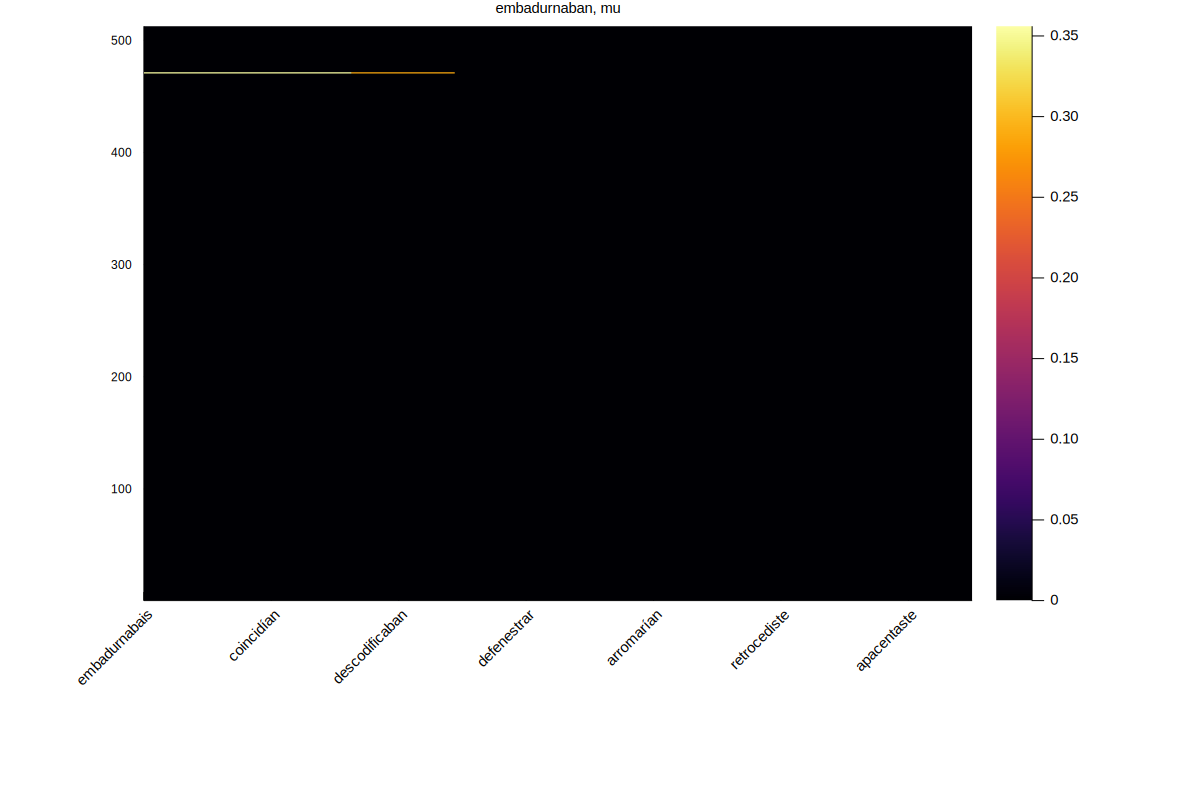

┌ Warning: GR: heatmap only supported with equally spaced data.
└ @ Plots /home/gridsan/eakyurek/.julia/packages/Plots/Iuc9S/src/backends/gr.jl:945


In [35]:
h1

# To-Dos
1. Add unrelated surface forms to the examplars too see whether the attention mappings are meaningful
2. Comparing with Normal Vae
3. Different Sampling Function on LM ($top_k$, temperature)
4. Attention in Decoder
5. Attention to the hidden state sequence, not just to the final state.
6. Metric for testing generation quality?

In [36]:
KnetLayers.gc()

In [38]:
morph2 = VAE(length(vocab.chars); H=256, E=32, Z=32)
train1!(morph2, data, vocab; optim=Adam(), epoch=30)

ErrorException: cudnnSetDropoutDescriptor: 8: CUDNN_STATUS_EXECUTION_FAILED

In [24]:
samples = sample(morph2, vocab, edata; N=10000)

UndefVarError: UndefVarError: morph2 not defined

In [25]:
samples[findall([s ∈ trainsfs for s in samples])]

6723-element Array{String,1}:
 "granjees"        
 "ingresabais"     
 "frustrares"      
 "desprecintó"     
 "no labres"       
 "engangrenados"   
 "se pavonearon"   
 "transpusisteis"  
 ⋮                 
 "forjaran"        
 "supondría"       
 "no descongelemos"
 "usado"           
 "enceguecida"     
 "friccionaste"    
 "desarticuló"     

In [26]:
samples[findall([s ∈ testsfs for s in samples])]

11-element Array{String,1}:
 "amerizasteis" 
 "encuadernare" 
 "mostremos"    
 "refundamos"   
 "ligué"        
 "mostremos"    
 "enconarais"   
 "rojeare"      
 "astriñeses"   
 "ligué"        
 "deshidratemos"

In [27]:
samples[findall([s ∈ dictsfs for s in samples])]

7742-element Array{String,1}:
 "granjees"        
 "ingresabais"     
 "frustrares"      
 "desprecintó"     
 "no labres"       
 "engangrenados"   
 "se pavonearon"   
 "transpusisteis"  
 ⋮                 
 "supondría"       
 "no fiquéis"      
 "no descongelemos"
 "usado"           
 "enceguecida"     
 "friccionaste"    
 "desarticuló"     

In [28]:
sampleinter(morph2, vocab, edata; N=10)

UndefVarError: UndefVarError: morph2 not defined